<h1>Import Libraries

In [44]:
import pandas as pd
import numpy as np
import missingno as msno

<h1>Get Overview of Dataset

In [48]:
df = pd.read_csv('sample_dataset.csv')

In [23]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,NaN,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,NaN,>4,72


<Axes: >

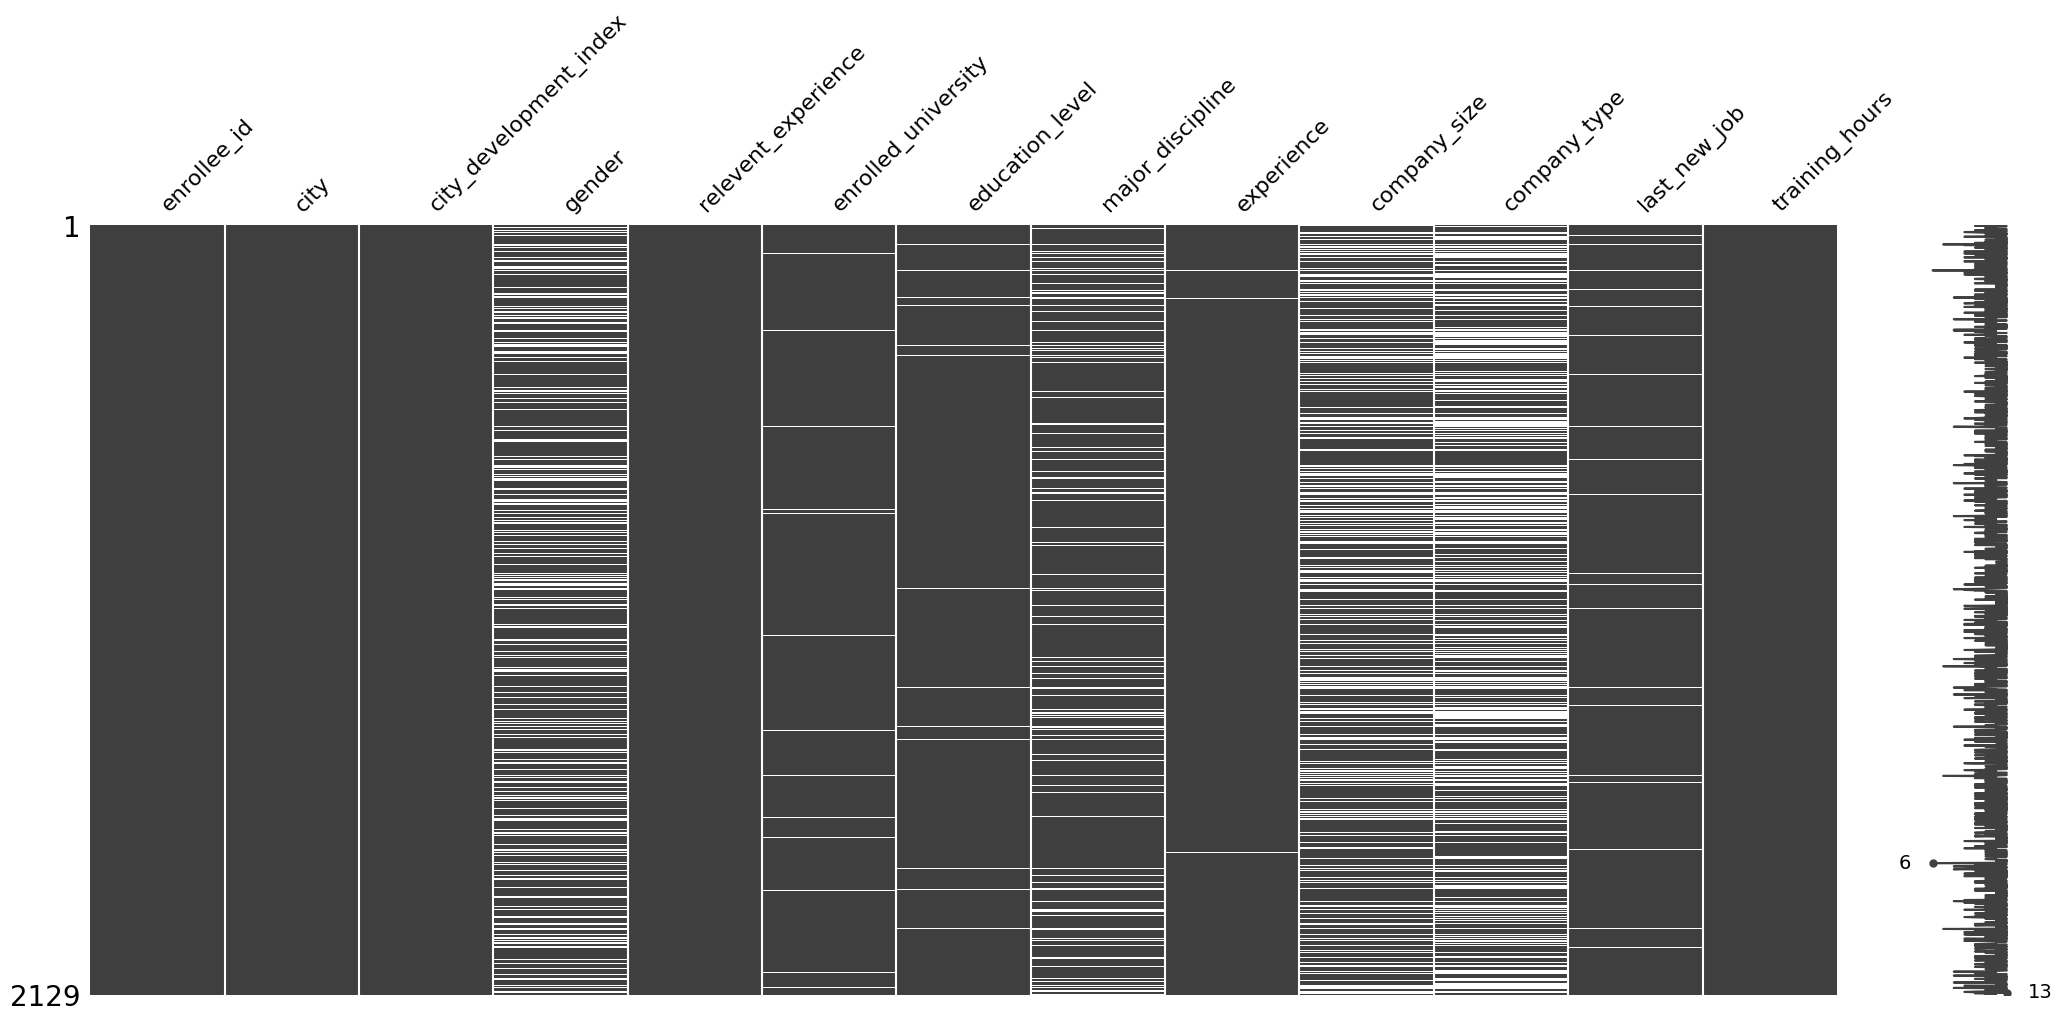

In [24]:
msno.matrix(df)

<h3>Find out the Count and Percentage of Missing Values for Each Column

In [25]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              867
last_new_job               40
training_hours              0
dtype: int64

In [26]:
def column_missing_value_percentiles(df):
  values = df.isnull().sum().values/df.shape[1]
  columns = df.columns
  for idx in range(len(columns)):
    print(f"{columns[idx]}: {values[idx].round()}%")

In [27]:
column_missing_value_percentiles(df)

enrollee_id: 0.0%
city: 0.0%
city_development_index: 0.0%
gender: 39.0%
relevent_experience: 0.0%
enrolled_university: 2.0%
education_level: 4.0%
major_discipline: 24.0%
experience: 0.0%
company_size: 48.0%
company_type: 67.0%
last_new_job: 3.0%
training_hours: 0.0%


<h1>Solutions

<h3>Dropping Rows

In [28]:
def drop_rows(df, columns):
  df.dropna(subset=columns, inplace=True)

In [49]:
drop_rows(df, ['enrolled_university', 'education_level', 'last_new_job', 'experience'])

<h3>Dropping Columns

In [30]:
def drop_columns(df, columns):
  df.drop(columns, axis = 1, inplace = True)

In [50]:
drop_columns(df, ['company_type'])

<h3> Mean, Median, Mode methods

In [32]:
def fill_mode(df, column):
  mode = df[column].mode()[0]
  df[column] = df[column].fillna(mode)

In [33]:
def fill_mean(df, column):
  mean = df[column].mean()
  df[column] = df[column].fillna(mean)

In [34]:
def fill_median(df, column):
  median = df[column].median()
  df[column] = df[column].fillna(median)

In [35]:
fill_mode(df, 'gender')

<h3>Divide and Conquer

In [51]:
df['company_size'].unique()

array(['<10', nan, 'Oct-49', '10000+', '100-500', '50-99', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

In [52]:
df['experience'].unique()

array(['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', '17', '18', '12'],
      dtype=object)

In [53]:
def divide_and_conquer(df, column_to_conquer, column_to_divide):
  modes = []
  for i in df[column_to_divide].unique():
    mode = df[df[column_to_divide] == i][column_to_conquer].mode()[0]
    modes.append(mode)

  for i in range(df[column_to_divide].nunique()):
    mask = df[column_to_divide] == df[column_to_divide].unique()[i]
    mode_value = modes[i]
    df.loc[mask, column_to_conquer] = df.loc[mask, column_to_conquer].fillna(mode_value)

In [54]:
column_to_conquer = 'company_size'
column_to_divide = 'experience'

divide_and_conquer(df, column_to_conquer, column_to_divide)

<h3>Random Imputation

In [55]:
def random_imputation(df, column):
  options = df[column].dropna().unique()
  df[column] = df[column].apply(lambda x: np.random.choice(options) if pd.isna(x) else x)

In [56]:
random_imputation(df, 'major_discipline')

<h3>Model-based Methods

In [62]:
column_to_fill = 'gender'

df_train = df.dropna()
df_test = df[df[column_to_fill].isna()]

X = df.drop(column_to_fill, axis = 1)
y = df[column_to_fill]

X_train = df_train.drop(column_to_fill, axis = 1)
y_train = df_train[column_to_fill]

X_test = df_test.drop(column_to_fill, axis = 1)

In [68]:
X_train = pd.get_dummies(X_train, columns=X_train.select_dtypes(include = 'object').columns, drop_first=True)

In [70]:
X_test = pd.get_dummies(X_test, columns=X_test.select_dtypes(include = 'object').columns, drop_first=True)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

predictions = knn_classifier.predict(X_test)

KNeighborsClassifier(n_neighbors=3)